In [46]:
import pip

def install(package):
    if hasattr(pip, 'main'):
        pip.main(['install', package])
    else:
        pip._internal.main(['install', package])
        
install("networkx")

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


good labeling found
1-3: 3
1-4: 4
1-5: 5
1-6: 6
1-8: 8
1-11: 11
3-4: 12
3-5: 2
4-5: 7
6-8: 9
6-11: 1
8-11: 10


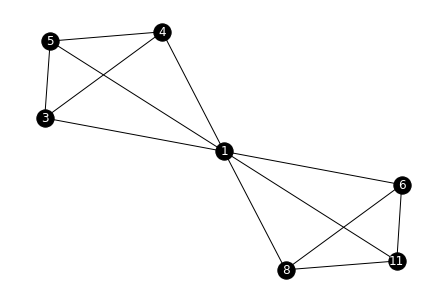

In [45]:
import networkx as nx
import itertools as it

def _get_mapping(vertex_list, labeling_list):
    labeling_iterator = iter(labeling_list)
    mapping = dict()
    for vertex in vertex_list:
        mapping[vertex] = next(labeling_iterator)
    return mapping

def _is_valid_labeling(graph, mod):
    edge_labels = set()
    [edge_labels.add((u*v)%mod) for u,v in graph.edges()]
    if len(edge_labels)==graph.number_of_edges():
        return True
    else:
        return False

u21 = [1, 2, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20]
u13 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

k4_snake = nx.parse_adjlist(["1 2 3 4 5 6 7", "2 3 4", "3 4", "5 6 7", "6 7"])

test_graph = k4_snake
labeling_set = u13

for combination in it.combinations(labeling_set, test_graph.number_of_nodes()):
    test_graph = nx.relabel_nodes(test_graph, _get_mapping(test_graph, combination))
    if _is_valid_labeling(test_graph, (max(labeling_set)+1)):
        print("good labeling found")
        nx.draw(test_graph, with_labels=True, font_color="white", node_color="black")
        for u,v in test_graph.edges():
            print(f"{u}-{v}: {(u*v)%(max(labeling_set)+1)}")
        break
else:
    print("No valid labeling found")